# Topics in Software Engineering
## Fall 2018
## Team Members:
### Amarender Reddy Patel
### Sai Sumanth Kambala
### Anusha Kotti

In [1]:
# Importing all the required Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
import math

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Defining the column names and reading the data file which is in csv format
colNames = ['BibNumber', 'Call Number', 'Month', 'Date', 'Hours', 'Min', 
            'AMPM', 'Year', 'XYZ-Split 8','XYZ','item Type','ItemBarcode','Collection','X','Table Name']
data = pd.read_csv("F:\Data.csv", names=colNames, header=0)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Shows the first rows in the data
data.head()

,BibNumber,Call Number,Month,Date,Hours,Min,AMPM,Year,XYZ-Split 8,XYZ,item Type,ItemBarcode,Collection,X,Table Name
0,2866447,282.092 D3308D 1997,7,19,2.0,45.0,PM,2014,2014 02,07/19/2014 02:45:00 PM,cab,10077659265,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
1,2680408,B AL276F 2011,12,30,6.0,6.0,PM,2014,2014 06,12/30/2014 06:06:00 PM,cab,10073115320,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
2,475976,B AL445,11,12,1.0,52.0,PM,2014,2014 01,11/12/2014 01:52:00 PM,cab,10010117645,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
3,2450371,B Ad185A 2007,4,12,3.0,35.0,PM,2014,2014 03,04/12/2014 03:35:00 PM,cab,10058490714,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
4,48815,B An434A,7,10,12.0,32.0,PM,2014,2014 12,07/10/2014 12:32:00 PM,cab,10082769190,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv


In [4]:
#Reading the File.
data

,BibNumber,Call Number,Month,Date,Hours,Min,AMPM,Year,XYZ-Split 8,XYZ,item Type,ItemBarcode,Collection,X,Table Name
0,2866447,282.092 D3308D 1997,7,19,2.0,45.0,PM,2014,2014 02,07/19/2014 02:45:00 PM,cab,10077659265,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
1,2680408,B AL276F 2011,12,30,6.0,6.0,PM,2014,2014 06,12/30/2014 06:06:00 PM,cab,10073115320,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
2,475976,B AL445,11,12,1.0,52.0,PM,2014,2014 01,11/12/2014 01:52:00 PM,cab,10010117645,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
3,2450371,B Ad185A 2007,4,12,3.0,35.0,PM,2014,2014 03,04/12/2014 03:35:00 PM,cab,10058490714,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
4,48815,B An434A,7,10,12.0,32.0,PM,2014,2014 12,07/10/2014 12:32:00 PM,cab,10082769190,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
5,1345228,B An43S,3,8,11.0,57.0,AM,2014,2014 11,03/08/2014 11:57:00 AM,cab,10033067777,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
6,726633,B Ar17K,6,4,3.0,28.0,PM,2014,2014 03,06/04/2014 03:28:00 PM,cab,102792843,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
7,2650425,B Ar626A 2010,5,14,11.0,2.0,AM,2014,2014 11,05/14/2014 11:02:00 AM,cab,10071233612,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
8,3027918,B Au46G 2014,11,12,6.0,50.0,PM,2014,2014 06,11/12/2014 06:50:00 PM,cab,10083745819,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv
9,2863156,B Au74B 2013,3,6,3.0,52.0,PM,2014,2014 03,03/06/2014 03:52:00 PM,cab,10077734852,acbk,1,Checkouts_By_Title_Data_Lens_2014.csv


In [5]:
# In this step we are considering the month column of which the future month which is 12(dec) is considered as True else the rest as false.
# whiich represents the output value for our prediction. So we generate a out column Y. 
data['y'] = np.where(data['Month'] == 12, '1', '0')

In [6]:
#data.head(5)


In [7]:
# In this step we are removing the rows which are dependent and also to reduce the complexity of our data.
data.drop(['Month', 'Date', 'Hours', 'Min', 'AMPM', 'Year', 'XYZ-Split 8','XYZ','X','Table Name'], axis=1, inplace=True)

In [9]:
 #It is used to check columns of the file
data.BibNumber.value_counts()

3030520    14807
3002433     8225
2980765     7565
2980488     7527
2973629     7513
2980484     7104
2963324     6833
3081381     6728
2980502     6728
2963325     6686
3069315     6637
2980539     6566
2919580     6541
2968772     6536
3064512     6471
2980536     6417
2991023     6404
2973649     6368
2969548     6334
2991041     6272
3077293     6148
3042757     6089
2938588     5996
3069329     5981
3054316     5970
3068436     5922
2985361     5882
2980519     5862
2969584     5660
2980495     5652
           ...  
1329625        1
2370025        1
3156844        1
170750         1
552037         1
137966         1
2687184        1
142637         1
334350         1
2697292        1
2203295        1
55991          1
121495         1
2419188        1
3222348        1
601164         1
2730073        1
109916         1
339404         1
2711424        1
1879804        1
3090575        1
449136         1
1666631        1
2419190        1
1644936        1
2711425        1
77134         

Text(0.5,1,'BibNumbervsValue_counts')

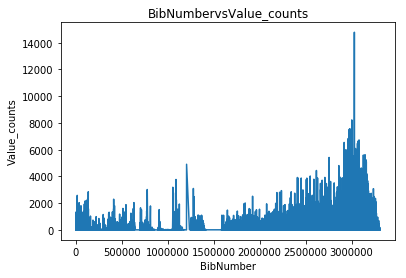

In [158]:
data.BibNumber.value_counts().sort_index().plot()
plt.xlabel('BibNumber')
plt.ylabel('Value_counts')
plt.title('BibNumbervsValue_counts')

In [12]:
data.ItemBarcode.value_counts()

10059206580    269
10059206275    250
10079802194    243
10059206432    241
10059206598    237
10058921270    223
10059206622    194
10059206424    194
10059206309    190
10079802202    188
10059206473    187
10059206796    181
10081900614    180
10059206267    180
10059206788    176
10059206754    166
10059206465    163
10059206812    163
10059206804    159
10088204432    158
10059206325    158
10059206770    141
10059206317    140
10059206630    131
10059206606    127
10059206762    127
10059206283    126
10080898900    125
10079802210    122
10080559114    121
              ... 
10090636498      1
10089972938      1
10085855152      1
10060103313      1
10048468028      1
10059095009      1
10090276642      1
10077429669      1
10090063818      1
10090096602      1
101567287        1
10070909295      1
101252526        1
10092329753      1
10069135316      1
10081736687      1
10078453452      1
10082809533      1
10059315217      1
10061864616      1
104509062        1
10089579915 

Text(0.5,1,'ItemBarcodevsValue_counts')

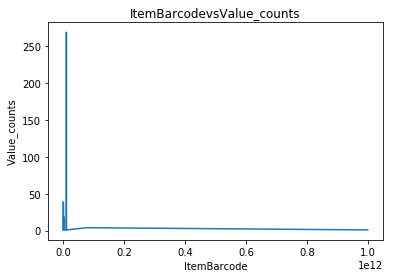

In [159]:
data.ItemBarcode.value_counts().sort_index().plot()
plt.xlabel('ItemBarcode')
plt.ylabel('Value_counts')
plt.title('ItemBarcodevsValue_counts')

In [17]:
data.Collection.value_counts()

acbk       8054944
jcbk       6962374
acdvd      6592567
accd       2558965
jcdvd      1018220
jccd        334089
ucfold       55396
acmus        31417
pkbknh       27247
bcbk         22995
aceq         15512
dcillb       14923
jckit        11268
acfold        6393
alaptop       6298
bcdvd         5267
bccd          3391
arbk          1899
acrec         1362
aceqnh         887
ahbk           748
atablet        386
areq           338
bckit          194
jcmus          187
acmap          123
accdrom         86
areqnh          65
jrbk            59
arper           40
ackit           37
acpam           31
jccas           30
accas           24
ucunknj         17
acper           16
ucunkn          12
acpost          11
arcd            10
acvhs           10
bcvhs            8
armfc            6
armfm            6
arrec            5
armus            3
ardvd            2
acart            2
acdisk           2
armap            1
acslide          1
arcas            1
acphoto          1
arkit       

Text(0.5,1,'Collectionsvscounts')

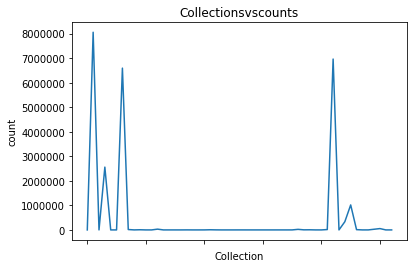

In [160]:
data.Collection.value_counts().sort_index().plot()
plt.xlabel('Collection')
plt.ylabel('count')
plt.title('Collectionsvscounts')

Text(0.5,1,'yvscounts')

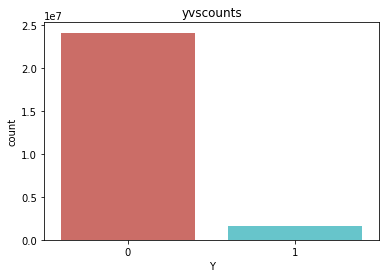

In [161]:
sns.countplot(x='y',data=data, palette='hls')
plt.xlabel('Y')
plt.ylabel('count')
plt.title('yvscounts')

In [21]:
data.head()

,BibNumber,Call Number,item Type,ItemBarcode,Collection,y
0,2866447,282.092 D3308D 1997,cab,10077659265,acbk,0
1,2680408,B AL276F 2011,cab,10073115320,acbk,1
2,475976,B AL445,cab,10010117645,acbk,0
3,2450371,B Ad185A 2007,cab,10058490714,acbk,0
4,48815,B An434A,cab,10082769190,acbk,0


In [23]:
# this command is to check whether the contains the Null values. if so we have to add value to null. in my case that doesnt happens because my data have all columns filled with values 
data.isnull()

,BibNumber,Call Number,item Type,ItemBarcode,Collection,y
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [24]:
# to check the datatype and size of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25727877 entries, 0 to 25727876
Data columns (total 6 columns):
BibNumber      int64
Call Number    object
item Type      object
ItemBarcode    int64
Collection     object
y              object
dtypes: int64(2), object(4)
memory usage: 1.2+ GB


In [25]:
# to replace not null value with 1 and null value with 0
data.isnull().sum()

BibNumber         0
Call Number    1257
item Type         0
ItemBarcode       0
Collection        0
y                 0
dtype: int64

In [26]:
#data.drop(['Month','XYZ','X'], axis=1, inplace=True)

In [27]:
#data.head(5)

In [28]:
#data

In [29]:
data.dtypes

BibNumber       int64
Call Number    object
item Type      object
ItemBarcode     int64
Collection     object
y              object
dtype: object

In [30]:
# Here we are trying to find the count the distinct values in each column
data.apply(lambda x: len(x.unique()))

BibNumber       495165
Call Number     404121
item Type          232
ItemBarcode    2190472
Collection          53
y                    2
dtype: int64

In [31]:
data.index

RangeIndex(start=0, stop=25727877, step=1)

In [32]:
data.columns

Index(['BibNumber', 'Call Number', 'item Type', 'ItemBarcode', 'Collection',
       'y'],
      dtype='object')

In [33]:
data.isnull().sum()

BibNumber         0
Call Number    1257
item Type         0
ItemBarcode       0
Collection        0
y                 0
dtype: int64

In [34]:
data.dropna(inplace=True)
data.isnull().sum()

BibNumber      0
Call Number    0
item Type      0
ItemBarcode    0
Collection     0
y              0
dtype: int64

In [35]:
data.shape

(25726620, 6)

In [36]:
# this is used convert the data to matrix format where we are not considering the last column(i.e. out column)
X = data.iloc[:, : -1].values

In [37]:
X

array([[2866447, '282.092 D3308D 1997', 'cab', 10077659265, 'acbk'],
       [2680408, 'B AL276F 2011', 'cab', 10073115320, 'acbk'],
       [475976, 'B AL445', 'cab', 10010117645, 'acbk'],
       ...,
       [1278860, 'UNCAT', 'nafold', 10055943186, 'ucfold'],
       [1278860, 'UNCAT', 'nafold', 10058834069, 'ucfold'],
       [1860664, '746 D587M', 'canf', 10056735763, 'ucunkn']],
      dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder = LabelEncoder()

In [40]:
#This helps to convert the categorical data to numerical data. this command selects the first column of the data.
X[ : ,0] = label_encoder.fit_transform(X[ : ,0])

In [41]:
X

array([[333551, '282.092 D3308D 1997', 'cab', 10077659265, 'acbk'],
       [268190, 'B AL276F 2011', 'cab', 10073115320, 'acbk'],
       [39208, 'B AL445', 'cab', 10010117645, 'acbk'],
       ...,
       [58669, 'UNCAT', 'nafold', 10055943186, 'ucfold'],
       [58669, 'UNCAT', 'nafold', 10058834069, 'ucfold'],
       [90446, '746 D587M', 'canf', 10056735763, 'ucunkn']], dtype=object)

In [42]:
#This helps to convert the categorical type to numerical datatype. this command selects the second column of the data.
X[ : ,1] = label_encoder.fit_transform(X[ : ,1])

In [43]:
X[ : ,2] = label_encoder.fit_transform(X[ : ,2])

In [44]:
X[ : ,3] = label_encoder.fit_transform(X[ : ,3])

In [45]:
X[ : ,4] = label_encoder.fit_transform(X[ : ,4])

In [46]:
X

array([[333551, 15456, 2, 981585, 1],
       [268190, 186204, 2, 727285, 1],
       [39208, 186224, 2, 41089, 1],
       ...,
       [58669, 384115, 151, 242565, 50],
       [58669, 384115, 151, 274045, 50],
       [90446, 111080, 45, 253257, 51]], dtype=object)

In [47]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=[0])

In [48]:
# assigning the array values to the input X value.
X = onehotencoder.fit_transform(X)

In [49]:
y = data["y"]

In [50]:
# this command is to split the data and test and train them with 20% of data for testing and the rest for training the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
X_train

<20581296x495164 sparse matrix of type '<class 'numpy.float64'>'
	with 102906472 stored elements in Compressed Sparse Row format>

In [148]:
y_test

7958654     0
795037      0
1302492     1
3923091     1
9934504     0
16964481    0
6449045     0
24914901    0
18885044    0
1592942     0
5575173     0
4103831     0
9706103     0
20460580    0
21074336    0
5690817     0
820087      0
11981610    0
8930232     0
6699464     0
4714286     0
357693      0
16539696    0
8412405     0
9038998     0
5926896     0
20273470    0
9534863     0
19854201    0
5913789     1
           ..
21851751    0
6143749     0
19526214    0
11885441    0
17857273    0
84753       0
13730373    1
19872914    0
11053200    0
11400691    0
11835780    0
13936210    0
7399657     0
19459391    0
7176146     0
8113067     0
7552341     1
562028      0
9547712     0
3084728     0
11579531    0
496259      0
15194406    0
8035453     0
13349009    0
92930       0
7650535     0
21682147    0
25455072    0
6350935     0
Name: y, Length: 7717986, dtype: object

## Model Building

In [53]:
logmodel = LogisticRegression()

In [54]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
# Considering the predicted value by using the input array values
predictions = logmodel.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
#Grouping the input and output variables.
classification_report(y_test, predictions)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          0       0.94      1.00      0.97   4827208\n          1       0.00      0.00      0.00    318116\n\navg / total       0.88      0.94      0.91   5145324\n'

In [58]:
# Calling confusion matrix. which gives the matrix data contains True positive, true negative, false positive and false negative vales.
from sklearn.metrics import confusion_matrix

## Confusion Matrix

In [59]:
confusion_matrix(y_test, predictions)

array([[4827208,       0],
       [ 318116,       0]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

## Accuracy of the Model

In [61]:
# the accuracy is calculates as the by adding True positive and falsenagative vales and divides by the total number of values. here is the accuracy rate which is very high.
accuracy_score(y_test, predictions)

0.9381737670941616

In [122]:
y1=y_test.iloc[:, ].values

In [149]:
y1

array(['0', '0', '1', ..., '0', '0', '0'], dtype=object)

In [123]:
predictions

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [83]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
y2 = label_binarize(y1, classes=[0, 1])
pred =label_binarize(predictions, classes=[0, 1])
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [155]:
fpr

{0: array([0., 1.]), 'micro': array([0., 1.])}

In [157]:
tpr

{0: array([nan, nan]), 'micro': array([nan, nan])}